In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import datetime

In [2]:
rcParams['figure.figsize'] = (15, 10)
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

## Exercise 1

In [3]:
page_1 = pd.read_excel('/Users/stanislav/Downloads/Trainee.xlsx', sheet_name='FirstEnter')
page_1

,PlayerUid,Max AchievedStep,RefPlace
0,754589776,1,Organic
1,754589626,8,Organic
2,754589354,8,Traffic
3,754589351,8,Organic
4,754589281,1,Organic
...,...,...,...
1187,754370502,0,Organic
1188,754370356,1,Traffic
1189,754370304,0,Organic
1190,750958760,0,Organic


In [4]:
number_of_people = np.size(np.unique(page_1['PlayerUid'])) # check is there no accident repetition?
number_of_people

1192

In [5]:
data_for_graph = pd.DataFrame(page_1['Max AchievedStep'].value_counts().sort_index()) # creating table for graph
data_for_graph['Num of step'] = range(0, 9)
data_for_graph['Max AchievedStep'] = data_for_graph.apply(lambda x: (x['Max AchievedStep'] / number_of_people) * 100, axis=1)
data_for_graph = data_for_graph.rename(columns={'Max AchievedStep' : 'Fraction of people'})
data_for_graph

,Fraction of people,Num of step
0,22.567114,0
1,13.255034,1
2,2.348993,2
3,2.265101,3
4,2.348993,4
5,1.342282,5
6,7.550336,6
7,1.845638,7
8,46.476510,8


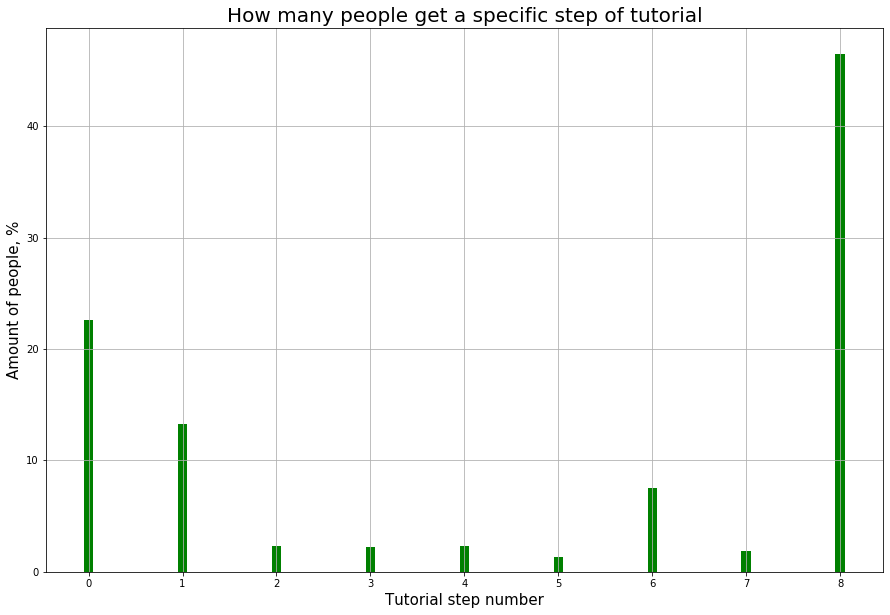

In [6]:
plt.bar(data_for_graph['Num of step'], data_for_graph['Fraction of people'], width=0.1, color='g')
plt.xlabel('Tutorial step number')
plt.ylabel('Amount of people, %')
plt.title('How many people get a specific step of tutorial')
plt.grid()
plt.show()

## Exercise 2

In [7]:
page_2 = pd.read_excel('/Users/stanislav/Downloads/Trainee.xlsx', sheet_name='RetentionRate')

In [8]:
page_2

,PlayerUid,DateTime,Registered
0,754371423,2019-03-10,2019-03-10
1,754371423,2019-03-11,2019-03-10
2,754371423,2019-03-10,2019-03-10
3,754371423,2019-03-10,2019-03-10
4,754371423,2019-03-10,2019-03-10
...,...,...,...
2830,754389536,2019-03-10,2019-03-10
2831,754404352,2019-03-10,2019-03-10
2832,754404613,2019-03-10,2019-03-10
2833,754521566,2019-03-11,2019-03-11


In [9]:
print(np.size(page_2["PlayerUid"].value_counts())) # check that number of registered players is 1192

1192


#### Let's count difference for every row between DateTime and Registered dates. Then I choose rows with only diffenerce 1, that is necessary for Retention Day 1. 

In [10]:
page_2["Difference"] = (page_2["DateTime"] - page_2["Registered"])

In [11]:
page_2

,PlayerUid,DateTime,Registered,Difference
0,754371423,2019-03-10,2019-03-10,0 days
1,754371423,2019-03-11,2019-03-10,1 days
2,754371423,2019-03-10,2019-03-10,0 days
3,754371423,2019-03-10,2019-03-10,0 days
4,754371423,2019-03-10,2019-03-10,0 days
...,...,...,...,...
2830,754389536,2019-03-10,2019-03-10,0 days
2831,754404352,2019-03-10,2019-03-10,0 days
2832,754404613,2019-03-10,2019-03-10,0 days
2833,754521566,2019-03-11,2019-03-11,0 days


In [12]:
page_2[page_2["Difference"] == '1 days'] # choose rows only with 1 day difference

,PlayerUid,DateTime,Registered,Difference
1,754371423,2019-03-11,2019-03-10,1 days
9,754371423,2019-03-11,2019-03-10,1 days
25,754565019,2019-03-12,2019-03-11,1 days
27,754565019,2019-03-12,2019-03-11,1 days
48,754389624,2019-03-11,2019-03-10,1 days
...,...,...,...,...
2339,754482079,2019-03-11,2019-03-10,1 days
2340,754430409,2019-03-11,2019-03-10,1 days
2493,754524302,2019-03-12,2019-03-11,1 days
2523,754463442,2019-03-11,2019-03-10,1 days


In [13]:
print(np.size(page_2[page_2["Difference"] == '1 days']["PlayerUid"].unique())) # remove same users

102


#### 102 users come to game in 1 day after registration 

In [14]:
retention_rate = 102 / number_of_people * 100
print('Retention Day 1 is {0}%'.format(retention_rate))

Retention Day 1 is 8.557046979865772%
